In [47]:
import scanpy as sc
import decoupler as dp
import matplotlib.pyplot as plt
import numpy as np

# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [48]:
path="/home/hpc/lianyun.huang/singlecell/final4"
path_data="/project/genomics/lianyun/CaIPACL/cp_from_homepath/data_final4"
pathout=path+"/output/output_decoupler"


title="soc_q"
# ep_con; q_con; soc_con; q_ep; soc_ep; soc_q

In [49]:
adata=sc.read_h5ad(path_data + "/mapmycellannotation_combine_"+ title +".h5ad")
print(title)
print(adata.shape)
print(adata.obs["status"].cat.categories)
print(adata.obs["broadtype"].cat.categories)

soc_q
(11558, 513)
Index(['q', 'soc'], dtype='object')
Index(['GABA', 'Glut', 'Others'], dtype='object')


/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### make pseudobulk

In [50]:
adata_dp = dp.get_pseudobulk(adata,sample_col="batch", 
                             groups_col="broadtype",
                             layer="soupX_counts",
                             mode="sum",min_cells=0,min_counts=0)

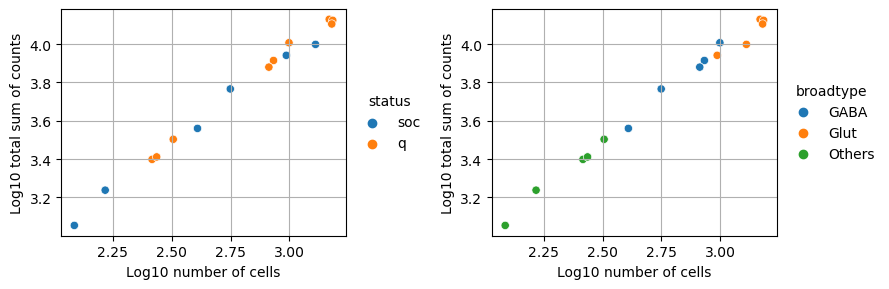

In [51]:
dp.plot_psbulk_samples(adata_dp, groupby=['status', 'broadtype'], 
                       figsize=(9, 3),
                      save=pathout+"/pseudobulk_"+title+".pdf")


### check pseudobulk profiles

In [52]:
pp_pdata = adata_dp.copy()
sc.pp.normalize_total(pp_pdata, target_sum=1e6)
sc.pp.log1p(pp_pdata)
sc.pp.scale(pp_pdata, max_value=10)
sc.tl.pca(pp_pdata, n_comps=10)

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


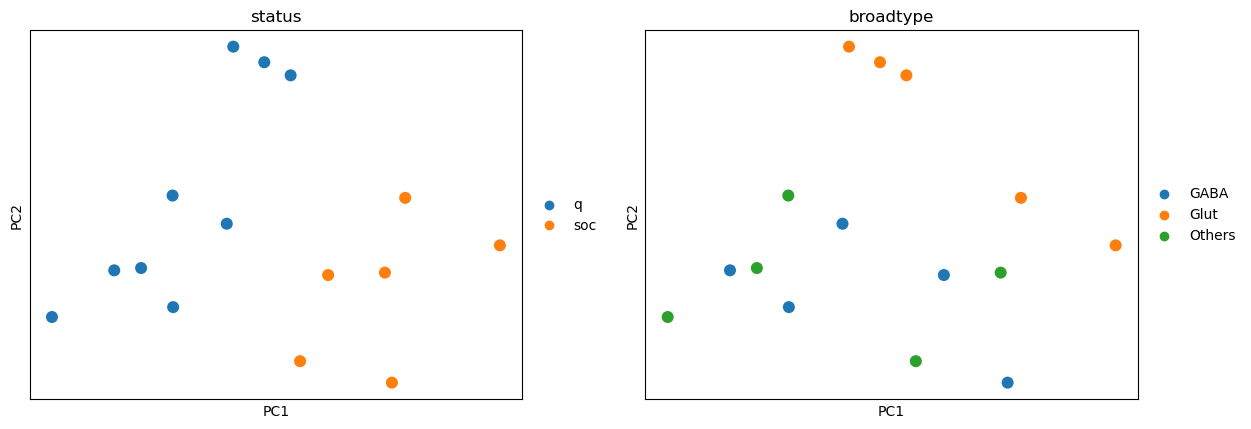

In [53]:
with plt.rc_context():
    sc.pl.pca(pp_pdata, color=['status', 'broadtype'], ncols=2, show=False, size=300)
    plt.savefig(pathout+"/top2PCs_"+title+".pdf")

### run DEG

In [54]:
strcontrol = adata.obs["status"].cat.categories[0]
strcontrast = adata.obs["status"].cat.categories[1]

title=strcontrast+"_compareto_"+strcontrol
print(title)

soc_compareto_q


GABA


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.71 seconds.

Fitting dispersion trend curve...
... done in 0.15 seconds.

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/pydeseq2/dds.py:363: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...


Log2 fold change & Wald test p-value: status soc vs q


... done in 0.46 seconds.

Fitting LFCs...
... done in 0.08 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.05 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,4.864253,0.263363,0.834076,0.315754,0.752189,0.981447
1700047F07Rik,2.811581,-1.528790,1.324200,-1.154500,0.248295,0.981447
1700054A03Rik,135.959442,-0.155801,0.185660,-0.839176,0.401371,0.981447
1700102P08Rik,3.330321,-0.268874,1.029820,-0.261088,0.794024,0.981447
1700126G02Rik,27.407665,-0.227465,0.427972,-0.531495,0.595076,0.981447
...,...,...,...,...,...,...
mt-Nd2,38.638184,0.485608,0.333188,1.457460,0.144989,0.981447
mt-Nd3,21.990744,0.519762,0.439406,1.182872,0.236860,0.981447
mt-Nd4,37.651310,0.223113,0.304840,0.731901,0.464229,0.981447
mt-Nd4l,2.988681,0.046531,1.177618,0.039513,0.968482,0.998416


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: status soc vs q


... done in 0.13 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,4.864253,0.006526,0.159742,0.315754,0.752189,0.981447
1700047F07Rik,2.811581,-0.018019,0.152805,-1.154500,0.248295,0.981447
1700054A03Rik,135.959442,-0.055303,0.130267,-0.839176,0.401371,0.981447
1700102P08Rik,3.330321,-0.004367,0.155767,-0.261088,0.794024,0.981447
1700126G02Rik,27.407665,-0.020249,0.152769,-0.531495,0.595076,0.981447
...,...,...,...,...,...,...
mt-Nd2,38.638184,0.074762,0.178799,1.457460,0.144989,0.981447
mt-Nd3,21.990744,0.045744,0.169635,1.182872,0.236860,0.981447
mt-Nd4,37.651310,0.036398,0.149637,0.731901,0.464229,0.981447
mt-Nd4l,2.988681,0.000623,0.161920,0.039513,0.968482,0.998416


Glut


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.78 seconds.

Fitting dispersion trend curve...
... done in 0.15 seconds.

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/pydeseq2/dds.py:363: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...


Log2 fold change & Wald test p-value: status soc vs q


... done in 0.53 seconds.

Fitting LFCs...
... done in 0.08 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.05 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,9.730330,-0.375770,0.679230,-0.553229,5.801065e-01,0.824476
1700047F07Rik,4.652211,0.195011,0.836460,0.233138,8.156543e-01,NaN
1700054A03Rik,195.725693,-0.253922,0.206504,-1.229625,2.188376e-01,0.637796
1700102P08Rik,4.542301,-0.073206,0.916027,-0.079917,9.363031e-01,NaN
1700126G02Rik,45.321327,-0.343920,0.247361,-1.390357,1.644205e-01,0.570012
...,...,...,...,...,...,...
mt-Nd2,89.006584,0.318995,0.271737,1.173909,2.404314e-01,0.657629
mt-Nd3,47.639797,0.685239,0.376453,1.820253,6.872042e-02,0.335939
mt-Nd4,69.503601,0.526626,0.158567,3.321153,8.964631e-04,0.018911
mt-Nd4l,7.357236,1.267855,0.675511,1.876883,6.053411e-02,0.321379


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: status soc vs q


... done in 0.11 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,9.730330,-0.068604,0.344832,-0.553229,5.801065e-01,0.824476
1700047F07Rik,4.652211,0.024685,0.360068,0.233138,8.156543e-01,NaN
1700054A03Rik,195.725693,-0.186142,0.191912,-1.229625,2.188376e-01,0.637796
1700102P08Rik,4.542301,-0.007708,0.360888,-0.079917,9.363031e-01,NaN
1700126G02Rik,45.321327,-0.232740,0.224730,-1.390357,1.644205e-01,0.570012
...,...,...,...,...,...,...
mt-Nd2,89.006584,0.198907,0.242567,1.173909,2.404314e-01,0.657629
mt-Nd3,47.639797,0.377712,0.359489,1.820253,6.872042e-02,0.335939
mt-Nd4,69.503601,-0.144270,0.416043,3.321153,8.964631e-04,0.018911
mt-Nd4l,7.357236,0.317921,0.541352,1.876883,6.053411e-02,0.321379


Others


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.65 seconds.

Fitting dispersion trend curve...
... done in 0.14 seconds.

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/pydeseq2/dds.py:363: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...


Log2 fold change & Wald test p-value: status soc vs q


... done in 0.32 seconds.

Fitting LFCs...
... done in 0.10 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.05 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,3.007287,1.008717,1.132478,0.890716,0.373081,0.992298
1700047F07Rik,1.016624,1.019283,1.316993,0.773947,0.438962,0.992298
1700054A03Rik,38.463238,-0.605207,0.251565,-2.405769,0.016138,0.776963
1700102P08Rik,0.942654,1.019283,1.316993,0.773947,0.438962,0.992298
1700126G02Rik,9.805263,-0.428175,0.485250,-0.882379,0.377572,0.992298
...,...,...,...,...,...,...
mt-Nd2,11.697128,1.325005,0.692623,1.913024,0.055745,0.992298
mt-Nd3,5.782174,2.436584,0.947683,2.571096,0.010138,0.776963
mt-Nd4,14.580511,0.577980,0.569157,1.015501,0.309867,0.992298
mt-Nd4l,0.828229,0.024383,2.003202,0.012172,0.990288,0.992298


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: status soc vs q


... done in 0.14 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700030K09Rik,3.007287,0.034165,0.270918,0.890716,0.373081,0.992298
1700047F07Rik,1.016624,-0.144270,0.329221,0.773947,0.438962,0.992298
1700054A03Rik,38.463238,-0.144270,0.329221,-2.405769,0.016138,0.776963
1700102P08Rik,0.942654,-0.144270,0.329221,0.773947,0.438962,0.992298
1700126G02Rik,9.805263,-0.144270,0.329221,-0.882379,0.377572,0.992298
...,...,...,...,...,...,...
mt-Nd2,11.697128,0.133850,0.340918,1.913024,0.055745,0.992298
mt-Nd3,5.782174,0.147229,0.414732,2.571096,0.010138,0.776963
mt-Nd4,14.580511,0.072785,0.260970,1.015501,0.309867,0.992298
mt-Nd4l,0.828229,0.000518,0.248890,0.012172,0.990288,0.992298


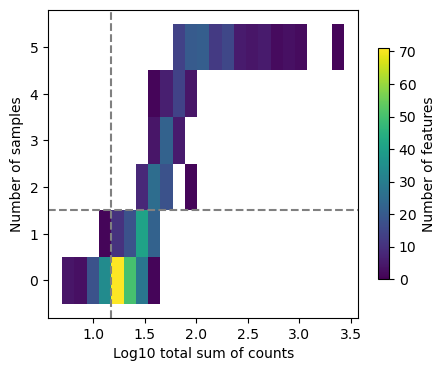

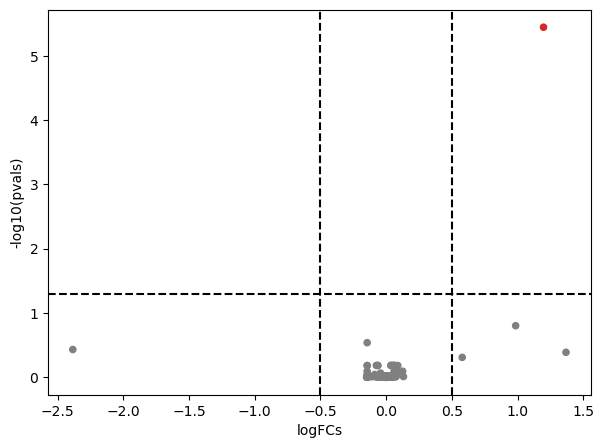

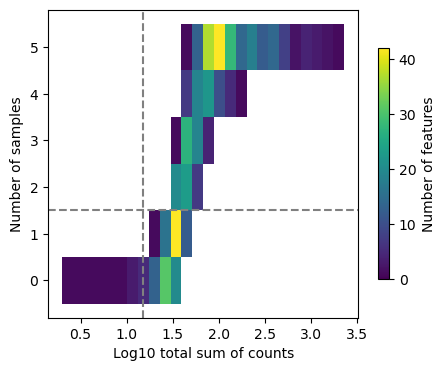

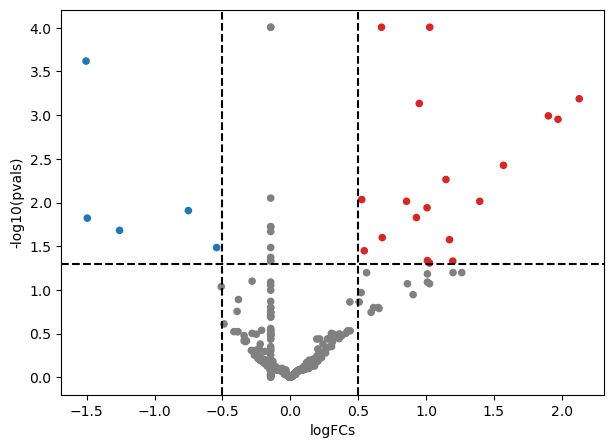

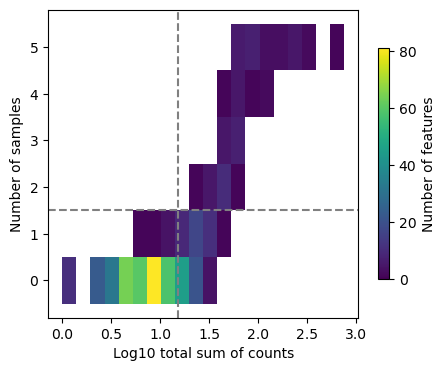

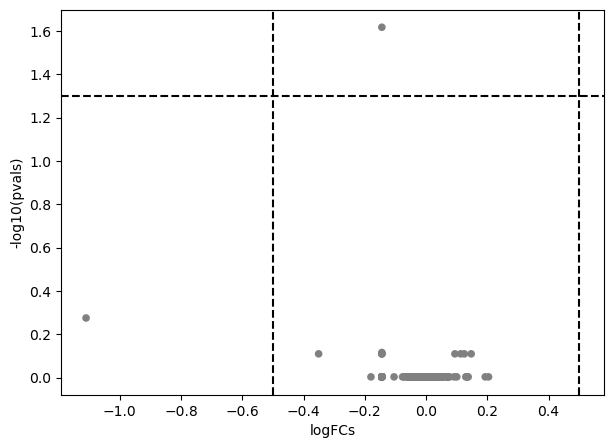

In [55]:
for i in adata.obs["broadtype"].cat.categories:
    print(i)
    
    try:
        # select cell profiles
	    tmp = adata_dp[adata_dp.obs['broadtype'] == i].copy()
	    # plot filter
	    dp.plot_filter_by_expr(tmp, group='status', 
	                       min_count=10, min_total_count=15,
	                       save=pathout+"/featureqc_"+title+"_"+i+".pdf")
	    
	    # Build DESeq2 object
	    dds = DeseqDataSet(
	        adata=tmp,
	        design_factors='status',
	        ref_level=["status",strcontrol],
	        refit_cooks=True,
	        n_cpus=8
	    )	

	    # Compute LFCs
	    dds.deseq2()
	    
	    # Extract contrast between two conditions
	    stat_res = DeseqStats(dds, 
	                          contrast=['status',strcontrast,strcontrol], 
	                          n_cpus=8)

	    # Compute Wald test
	    stat_res.summary()	

	    # Shrink LFCs
	    stat_res.lfc_shrink(coeff='status_'+strcontrast+'_vs_'+strcontrol)	

	    # Extract results
	    results_df = stat_res.results_df
        
        # global pvalue correction
	    results_df["pglobadj"]=results_df["padj"]*10
	    results_df=results_df.sort_values(by="pglobadj")
        
        # write csv
	    results_df.to_csv(pathout+"/DEGlist_"+title+"_"+i+".csv",index=True)
    
        # plot volcano
	    dp.plot_volcano_df(results_df, x='log2FoldChange', y='padj',top=0,
                          save=pathout+"/volcanoplot_"+title+"_"+i+".pdf")

    except ValueError:
        continue
